# Reading water connect observations

This notebook introduces how to use the `hydropandas` package to read, process and visualise data from the South Australia Water Connect database.

In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import contextily as cx
import matplotlib.pyplot as plt

import hydropandas as hpd
from hydropandas.io.water_connect import get_locations_gdf, get_locations_within_extent

# enabling debug logging so we can see what happens in the background
hpd.util.get_color_logger("INFO");

In [ ]:
# get water connect observations within an extent
extent = (140.86, 140.9, -38.05, -38.00) # (left, right, lower, upper) bounds in lat/lon
oc = hpd.read_waterconnect(extent=extent, tmin='2000-1-1')
oc

INFO:hydropandas.io.water_connect:downloading waterconnect data from 62 observation points


obs well: 100%|██████████| 62/62 [01:40<00:00,  1.62s/it]


,x,y,location,filename,source,unit,tube_nr,screen_top,screen_bottom,ground_level,tube_top,metadata_available,obs
name,,,,,,,,,,,,,
105146,140.877410,-38.017369,,,DEWNR (water connect),m AHD,,NaN,NaN,13.01,NaN,NaN,GroundwaterObs 105146 -----metadata------ name...
105147,140.887084,-38.015458,,,"DEWNR, DEW (water connect)",m AHD,,NaN,NaN,12.92,NaN,NaN,GroundwaterObs 105147 -----metadata------ name...
105306,140.871336,-38.018425,,,DEWNR (water connect),m AHD,,NaN,NaN,12.99,NaN,NaN,GroundwaterObs 105306 -----metadata------ name...
105319,140.897937,-38.018118,,,DEWNR (water connect),m AHD,,NaN,NaN,13.29,NaN,NaN,GroundwaterObs 105319 -----metadata------ name...
187285,140.891788,-38.010617,,,DEWNR (water connect),m AHD,,NaN,NaN,12.22,NaN,NaN,GroundwaterObs 187285 -----metadata------ name...
187286,140.885841,-38.010855,,,DEWNR (water connect),m AHD,,NaN,NaN,11.77,NaN,NaN,GroundwaterObs 187286 -----metadata------ name...
196601,140.877825,-38.008414,,,DEWNR (water connect),m AHD,,NaN,NaN,11.80,NaN,NaN,GroundwaterObs 196601 -----metadata------ name...
232794,140.861240,-38.032324,,,DEWNR (water connect),m AHD,,NaN,NaN,11.09,NaN,NaN,GroundwaterObs 232794 -----metadata------ name...
235416,140.861229,-38.032504,,,DEWNR (water connect),m AHD,,NaN,NaN,10.82,NaN,NaN,GroundwaterObs 235416 -----metadata------ name...


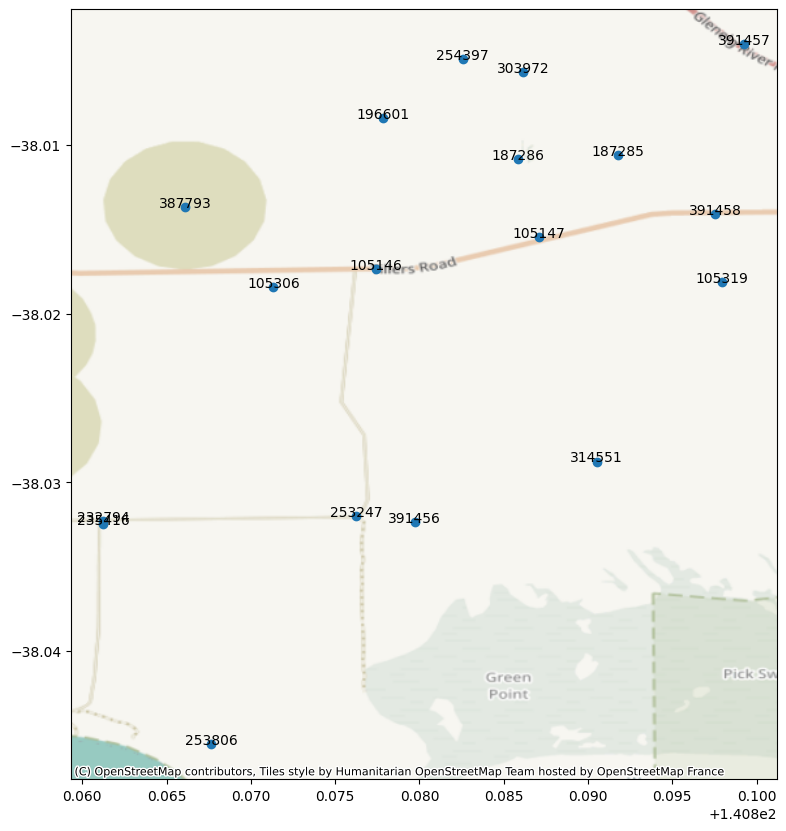

In [61]:
#plot locations on map
ax = oc.to_gdf(crs=4326).plot(figsize=(10,10),)
cx.add_basemap(ax=ax, crs=4326)

# add labels
for idx, row in oc.iterrows():
    ax.annotate(text=idx, xy=(row['x'], row['y']),
                 horizontalalignment='center')

<Axes: xlabel='obs_date', ylabel='m AHD'>

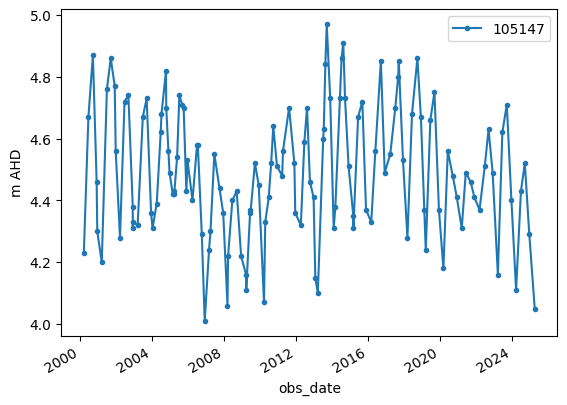

In [ ]:
# plot measurements from a single observation
o = oc.get_obs(105147)
o['rswl'].plot(marker='.', label=o.name, ylabel=o.unit, legend=True)

In [64]:
# get data from a certain measurement well based on the drillhole number (dh_no)
o1 = hpd.GroundwaterObs.from_waterconnect(95360)
o1

,95360
x,140.411598
y,-36.841521
location,
filename,
source,"DEWNR, DEW (water connect)"
unit,m AHD
tube_nr,
screen_top,NaN
screen_bottom,NaN
ground_level,41.73


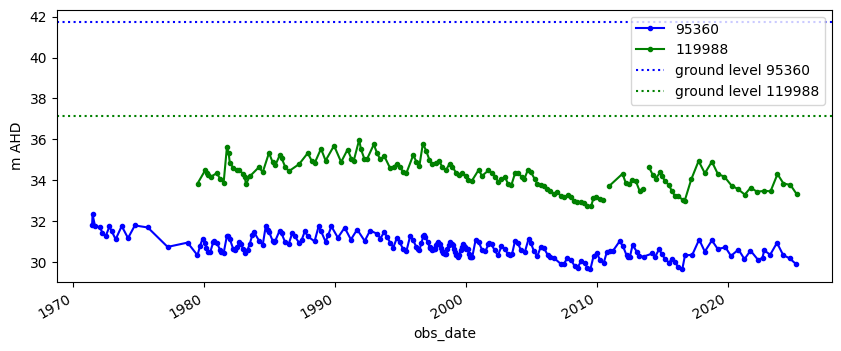

In [77]:
# get water levels from another drillhole and plot both
# o2 = hpd.GroundwaterObs.from_waterconnect(119988)

# plot data
f, ax = plt.subplots(figsize=(10,4))
o1["rswl"].plot(ylabel=o1.unit, label=o1.name, marker='.', color='b', ax=ax)
o2["rswl"].plot(ylabel=o2.unit, label=o2.name, marker=".", ax=ax, color='g');
ax.axhline(o1.ground_level, ls=':', color='b', label=f'ground level {o1.name}')
ax.axhline(o2.ground_level, ls=':', color='g', label=f'ground level {o2.name}')
ax.legend()

## Find selection criteria

Very often you don't know exactly the drillhole numbers (dh_no) of the measurements you want to download and it may be unfeasable to download all the observations in the extent. To get the data that you want you can follow these steps:
1. get a geodataframe with the metadata of all the locations in the extent
2. query the geodataframe by any metadata property such as REF_ELEV, STATUS, MAX_DEPTH
3. request the measurement for the locations you obtained at step 2

In [2]:
# step 1
extent = (140.86, 140.9, -38.05, -38.00) # (left, right, lower, upper) bounds in lat/lon

# get all locations
gdf = get_locations_gdf()
gdf_extent = get_locations_within_extent(gdf, extent)
gdf_extent


,UNIT_NO,NAME,EASTING,NORTHING,ZONE,LAT,LON,REF_ELEV,GRND_ELEV,HUND,...,TITLE_PREF,TITLE_VOLU,TITLE_FOLI,TITLE_ID,GRND_ELEV_,HGUID,FTYPE,NGIS,LATEST_REF,geometry
DHNO,,,,,,,,,,,,,,,,,,,,,
105107,702101052,None,487754.44,5793936.86,54,-38.002154,140.860521,17.108,17.10,None,...,CT,5410,833,CT5410/833,21.912327,0,None,None,None,POINT (140.86052 -38.00215)
105108,702101053,None,490937.36,5793850.92,54,-38.002966,140.896774,-9999.000,23.05,None,...,CT,5930,28,CT5930/28,23.581266,0,None,None,None,POINT (140.89677 -38.00297)
105146,702101091,None,489239.43,5792250.81,54,-38.017369,140.877410,-9999.000,13.01,None,...,None,None,None,None,15.000000,0,None,None,None,POINT (140.87741 -38.01737)
105147,702101092,None,490088.32,5792463.91,54,-38.015458,140.887084,13.759,12.92,None,...,CT,5844,352,CT5844/352,14.755128,0,None,None,None,POINT (140.88708 -38.01546)
105148,702101093,None,490193.38,5792402.91,54,-38.016009,140.888280,13.460,13.19,None,...,CT,5460,747,CT5460/747,18.047085,0,None,None,None,POINT (140.88828 -38.01601)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314551,702103656,None,490390.58,5790986.50,54,-38.028777,140.890507,-9999.000,27.12,None,...,CT,6012,332,CT6012/332,27.664576,0,None,None,None,POINT (140.89051 -38.02878)
387793,702103725,None,488247.57,5792660.48,54,-38.013664,140.866117,-9999.000,-9999.00,None,...,CT,5936,493,CT5936/493,13.339000,0,None,None,None,POINT (140.86612 -38.01366)
391456,702103731,None,489443.83,5790588.91,54,-38.032349,140.879714,8.141,7.39,None,...,CT,6012,333,CT6012/333,7.243739,0,None,None,None,POINT (140.87971 -38.03235)


In [3]:
# 2 query the GeoDataFrame

# print statistics of the reference elevation
gdf_extent.loc[gdf_extent['REF_ELEV']==-9999, 'REF_ELEV'] = np.nan
print(f'statistics of the reference elevation:\n{gdf_extent["REF_ELEV"].describe()}\n')

# print unique names
print(f'unique value in status column:\n {gdf_extent["STAT_DESC"].unique()}\n')

# print statistics of the maximum depth
gdf_extent.loc[gdf_extent['MAX_DEPTH']==-9999, 'MAX_DEPTH'] = np.nan
print(f'statistics of the max depth:\n{gdf_extent["MAX_DEPTH"].describe()}\n')

# select all observation points with some conditions
gdf_selection = gdf_extent.loc[(gdf_extent['REF_ELEV'] > 12.5) & (gdf_extent['MAX_DEPTH']>15)]
print(f'selected data:\n{gdf_selection}\n')

statistics of the reference elevation:
count    11.000000
mean     12.486364
std       4.364845
min       7.025000
25%       9.480500
50%      12.000000
75%      14.002000
max      21.717000
Name: REF_ELEV, dtype: float64

unique value in status column:
 [None 'Operational' 'Abandoned' 'Unequipped' 'Not Located' 'Blocked'
 'Backfilled']

statistics of the max depth:
count     61.000000
mean      68.838525
std      102.366295
min        0.100000
25%       15.500000
50%       24.000000
75%       56.000000
max      483.000000
Name: MAX_DEPTH, dtype: float64

selected data:
          UNIT_NO  NAME    EASTING    NORTHING  ZONE        LAT         LON  \
DHNO                                                                          
105107  702101052  None  487754.44  5793936.86    54 -38.002154  140.860521   
105147  702101092  None  490088.32  5792463.91    54 -38.015458  140.887084   
391457  702103732  None  491157.23  5793735.00    54 -38.004013  140.899277   
391458  702103733  None  491

In [4]:
# 3 read data for selection criteria
oc = hpd.read_waterconnect(location_gdf=gdf_selection)
oc

INFO:hydropandas.io.water_connect:downloading waterconnect data from 4 observation points


obs well: 100%|██████████| 4/4 [00:07<00:00,  1.86s/it]


,x,y,location,filename,source,unit,tube_nr,screen_top,screen_bottom,ground_level,tube_top,metadata_available,obs
name,,,,,,,,,,,,,
105107,140.860521,-38.002154,702101052,,DEWNR (water connect),m AHD,,NaN,NaN,17.10,NaN,NaN,GroundwaterObs 105107 -----metadata------ name...
105147,140.887084,-38.015458,702101092,,"DEWNR, DEW (water connect)",m AHD,,NaN,NaN,12.92,NaN,NaN,GroundwaterObs 105147 -----metadata------ name...
391457,140.899277,-38.004013,702103732,,DEW (water connect),m AHD,,NaN,NaN,21.07,NaN,NaN,GroundwaterObs 391457 -----metadata------ name...
391458,140.897543,-38.014105,702103733,,DEW (water connect),m AHD,,NaN,NaN,13.43,NaN,NaN,GroundwaterObs 391458 -----metadata------ name...


In [20]:
# plot the data on an interactive map
oc['lat'] = oc['y']
oc['lon'] = oc['x']
oc.plots.interactive_map()